In [2]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [3]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Implementing Random Forest, SVM and Logistic Regresion

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import pandas as pd


selector = SelectKBest(f_classif, k=2)

# Fit the selector on the training data and transform both training and test data
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Print the selected feature names
selected_features = x_train.columns[selected_indices]
print(f"Selected Features: {selected_features.tolist()}")

# Initialize the Random Forest model
modelRandomForest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
modelRandomForest.fit(x_train_selected, y_train)

# Make predictions on the test data
y_pred_random_forest = modelRandomForest.predict(x_test_selected)

# Calculate evaluation metrics for Random Forest
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)

# Print the metrics for Random Forest
print("\nRandom Forest Classifier Metrics:")
print("Accuracy:", accuracy_random_forest)
print("Recall:", recall_random_forest)
print("F1 Score:", f1_random_forest)


# Initialize the KNN model 
modelKNN = KNeighborsClassifier(n_neighbors=12)

# Fit the model on the training data
modelKNN.fit(x_train_selected, y_train)

# Make predictions on the test data
y_pred_knn = modelKNN.predict(x_test_selected)

# Calculate evaluation metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the metrics for KNN
print("\nKNN Classifier Metrics:")
print("Accuracy:", accuracy_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)


# Initialize the Logistic Regression model
modelLogistic = LogisticRegression(max_iter=500, random_state=42)

# Fit the model on the training data
modelLogistic.fit(x_train_selected, y_train)

# Make predictions on the test data
y_pred_logistic = modelLogistic.predict(x_test_selected)

# Calculate evaluation metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

# Print the metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)


Selected Features: ['AgeCategory', 'GenHealth']

Random Forest Classifier Metrics:
Accuracy: 0.7412324152962155
Recall: 0.8270373921380633
F1 Score: 0.7675743014771312

KNN Classifier Metrics:
Accuracy: 0.7402417277590648
Recall: 0.7861936720997124
F1 Score: 0.7577157641840695

Logistic Regression Metrics:
Accuracy: 0.744303546661383
Recall: 0.8007670182166826
F1 Score: 0.7639257294429709


Stacking

Stacking Classifier Metrics:
Accuracy: 0.744303546661383
Recall: 0.8007670182166826
F1 Score: 0.7639257294429709


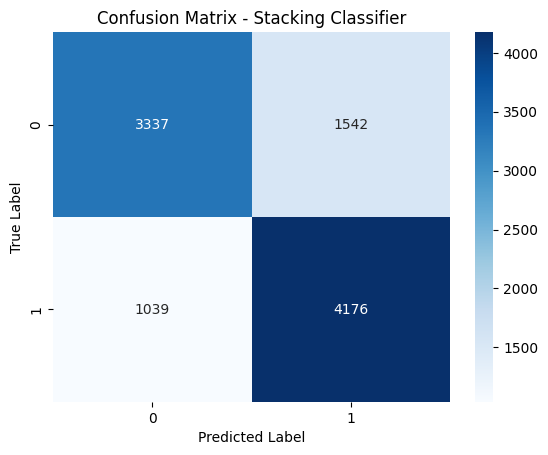

In [9]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a StackingClassifier
estimators = [
    ('logistic', modelLogistic),
    ('random_forest', modelRandomForest),
    ('svm', modelKNN)
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000))

# Fit the StackingClassifier on the training data
stacking_model.fit(x_train_selected, y_train)

# Make predictions for the test data
y_pred_stacking = stacking_model.predict(x_test_selected)

# Calculate evaluation metrics for stacking
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

# Print the metrics for stacking
print("Stacking Classifier Metrics:")
print("Accuracy:", accuracy_stacking)
print("Recall:", recall_stacking)
print("F1 Score:", f1_stacking)

# Plot the confusion matrix
sns.heatmap(conf_matrix_stacking, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()
